In [1]:
import numpy as np
import random

In [2]:
#定義sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))
#定義sigmoid function 的微分
def sigmoid_(x):
    return sigmoid(x)*(1-sigmoid(x))
#定義loss function
def loss(yt,yp):
    return 0.5*np.sum((yt-yp)**2)

In [3]:
#training data,X代表點座標(x,y) ex:第一個點為(0.1,0.1)
#y若=[1,0]代表該點有石油,y若=[0,1]代表該點沒有石油
X=np.array([[0.1, 0.3 ,0.1 ,0.6 ,0.4 ,0.6 ,0.5 ,0.9 ,0.4 ,0.7],[0.1 ,0.4 ,0.5 ,0.9 ,0.2 ,0.3 ,0.6 ,0.2 ,0.4 ,0.6]])
y=np.array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])
tol=1e-6
eta=0.05 #learning rate
Niter=1e6

In [4]:
def nnmodel(x,W1,W2,W3,b1,b2,b3):
    Z1=np.reshape(W1.dot(x),(2,1))+b1
    a1=sigmoid(Z1)
    Z2=W2.dot(a1)+b2
    a2=sigmoid(Z2)
    Z3=W3.dot(a2)+b3
    a3=sigmoid(Z3)
    return a3
#搭建並初始化網路模型(此處網路共有1層input layer,2層 hiddenlayer,1層output layer,activation function統一採用sigmoid)

#初始化:
np.random.seed(6000)
W1=0.5*np.random.randn(2,2)
W2=0.5*np.random.randn(3,2)
W3=0.5*np.random.randn(2,3)
b1=0.5*np.random.randn(2,1)
b2=0.5*np.random.randn(3,1)
b3=0.5*np.random.randn(2,1)

#開始搭建:
history=[]
cnt=0
while(cnt<Niter):
    cnt+=1
    k = np.random.randint(0,10)
    tempx=np.reshape(np.array((X[0][k],X[1][k])),(2,1))
    tempy=np.reshape(np.array((y[0][k],y[1][k])),(2,1))
    #forward pass
    Z1=np.reshape(W1.dot(tempx),(2,1))+b1
    a1=sigmoid(Z1)
    Z2=W2.dot(a1)+b2
    a2=sigmoid(Z2)
    Z3=W3.dot(a2)+b3
    a3=sigmoid(Z3)
    #backward pass
    delta3=sigmoid_(Z3)*(a3-tempy)
    delta2=sigmoid_(Z2)*(W3.T.dot(delta3))
    delta1=sigmoid_(Z1)*(W2.T.dot(delta2))
    #更新權重
    W1=W1-eta*(delta1.dot(tempx.T))
    b1=b1-eta*delta1
    W2=W2-eta*(delta2.dot(a1.T))
    b2=b2-eta*delta2
    W3=W3-eta*(delta3.dot(a2.T))
    b3=b3-eta*delta3
    
    history.append(loss(tempy,nnmodel(tempx,W1,W2,W3,b1,b2,b3)))
    if history[cnt-1]<tol:
        break

In [5]:
#用training data做測試
for i in range(10):
    tpx=np.reshape(np.array((X[0][i],X[1][i])),(2,1))
    print(nnmodel(tpx,W1,W2,W3,b1,b2,b3))
    print()

[[0.99859685]
 [0.00133764]]

[[0.94002088]
 [0.0594977 ]]

[[9.98960475e-01]
 [9.57520877e-04]]

[[0.9683271 ]
 [0.03082675]]

[[0.96023561]
 [0.03968734]]

[[0.00425682]
 [0.9958744 ]]

[[0.02694572]
 [0.97322697]]

[[0.00164798]
 [0.99842942]]

[[0.08897313]
 [0.91166766]]

[[0.00227945]
 [0.99780338]]



In [6]:
N = 500;
xpts = np.linspace(0,1,N+1)
ypts = np.linspace(0,1,N+1)
[XX,YY] = np.meshgrid(xpts,ypts)
gridpts=np.array([np.ravel(XX),np.ravel(YY)])
Binary=[]
for i in range(251001):
    tpx=np.reshape(np.array((gridpts[0][i],gridpts[1][i])),(2,1))
    Binary.append(nnmodel(tpx,W1,W2,W3,b1,b2,b3))
Binary=np.round(Binary)
Binary=np.reshape(Binary[:,0,:],(501,501))

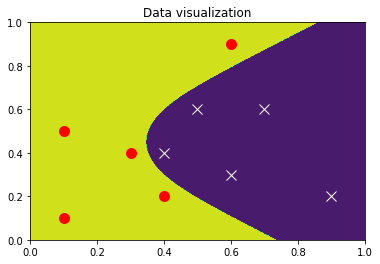

In [7]:
#繪製等高線圖
import matplotlib.pyplot as plt
plt.title("Data visualization")
plt.contourf(XX, YY, Binary)
plt.plot([X[0][0:5]],[X[1][0:5]],'ro', markersize=10)
plt.plot([X[0][5:10]],[X[1][5:10]],'wx',markersize=10)